### В этом jupiter-notebook мы подготовим датасет *Final_Augmented_dataset_Diseases_and_Symptoms* для обучения модели 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_df = pd.read_csv('Final_Augmented_dataset_Diseases_and_Symptoms.csv')

In [3]:
raw_df.head()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246945 entries, 0 to 246944
Columns: 378 entries, diseases to neck weakness
dtypes: int64(377), object(1)
memory usage: 712.2+ MB


In [5]:
raw_df['diseases'].unique()

array(['panic disorder', 'vocal cord polyp', 'turner syndrome',
       'cryptorchidism', 'poisoning due to ethylene glycol',
       'atrophic vaginitis', 'fracture of the hand',
       'cellulitis or abscess of mouth', 'eye alignment disorder',
       'headache after lumbar puncture', 'pyloric stenosis',
       'salivary gland disorder', 'osteochondrosis', 'injury to the knee',
       'metabolic disorder', 'vaginitis', 'sick sinus syndrome',
       'tinnitus of unknown cause', 'glaucoma', 'eating disorder',
       'transient ischemic attack', 'pyelonephritis',
       'rotator cuff injury', 'chronic pain disorder',
       'problem during pregnancy', 'liver cancer', 'atelectasis',
       'injury to the hand', 'choledocholithiasis', 'injury to the hip',
       'cirrhosis', 'thoracic aortic aneurysm', 'subdural hemorrhage',
       'diabetic retinopathy', 'fibromyalgia', 'ischemia of the bowel',
       'fetal alcohol syndrome', 'peritonitis', 'injury to the abdomen',
       'acute pancreati

In [6]:
len(raw_df['diseases'].unique())

773

В датасете имеется 773 и 378 уникальных заболевания и симптомов соответственно!

In [7]:
raw_df['diseases'].value_counts()

diseases
cystitis                          1219
nose disorder                     1218
vulvodynia                        1218
complex regional pain syndrome    1217
spondylosis                       1216
                                  ... 
open wound of the head               1
myocarditis                          1
chronic ulcer                        1
hypergammaglobulinemia               1
kaposi sarcoma                       1
Name: count, Length: 773, dtype: int64

In [8]:
symptoms = raw_df.iloc[:, 1:]

In [9]:
symptoms.head(3)

,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,palpitations,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
symptom_counts = symptoms.sum().sort_values(ascending=False)

In [11]:
symptom_counts

sharp abdominal pain            32307
vomiting                        27874
headache                        24719
cough                           24296
sharp chest pain                24016
                                ...  
lump over jaw                       0
hip weakness                        0
back swelling                       0
ankle stiffness or tightness        0
neck weakness                       0
Length: 377, dtype: int64

Значит, есть симптомы, которые ни разу не встречались ни для какого из 773 заболевания. Фактически они не вносят какого-либо смысла в определение заболевания. Уберем их

In [12]:
# Получаем список симптомов, которые никогда не встречаются
unused_symptoms = symptom_counts[symptom_counts == 0].index
unused_symptoms

Index(['infrequent menstruation', 'shoulder cramps or spasms',
       'joint stiffness or tightness', 'eye strain', 'underweight', 'pallor',
       'jaw pain', 'problems with orgasm', 'abnormal appearing tongue',
       'eyelid retracted', 'nose deformity', 'arm cramps or spasms',
       'mass on vulva', 'elbow lump or mass', 'tongue pain', 'pus in urine',
       'abnormal size or shape of ear', 'hip lump or mass',
       'low back swelling', 'hip swelling', 'foot or toe cramps or spasms',
       'pus in sputum', 'nailbiting', 'elbow cramps or spasms',
       'feeling hot and cold', 'feet turned in', 'pupils unequal',
       'disturbance of smell or taste', 'discharge in stools',
       'elbow stiffness or tightness', 'mass on ear', 'throat irritation',
       'swollen tongue', 'sleepwalking', 'bleeding in mouth',
       'knee cramps or spasms', 'posture problems',
       'low back stiffness or tightness', 'skin oiliness',
       'skin on head or neck looks infected', 'stuttering or st

In [13]:
len(unused_symptoms)

49

In [14]:
df0 = raw_df.drop(columns=unused_symptoms)

In [15]:
df0.head(3)

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,redness in or around nose,wrinkles on skin,foot or toe weakness,hand or finger cramps or spasms,back stiffness or tightness,wrist lump or mass,skin pain,low urine output,sore in nose,ankle weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Теперь найдем такие заболевания (если такие есть), у которых ни один из симптомов не встречается, либо отмеченных симптомов очень мало

In [16]:
raw_df['diseases'].value_counts()

diseases
cystitis                          1219
nose disorder                     1218
vulvodynia                        1218
complex regional pain syndrome    1217
spondylosis                       1216
                                  ... 
open wound of the head               1
myocarditis                          1
chronic ulcer                        1
hypergammaglobulinemia               1
kaposi sarcoma                       1
Name: count, Length: 773, dtype: int64

In [17]:
raw_df.groupby('diseases').sum().sum(axis=1).sort_values(ascending=False)

diseases
acute bronchitis                 7364
strep throat                     7349
gout                             7345
conjunctivitis due to allergy    7344
marijuana abuse                  7341
                                 ... 
thalassemia                         2
chronic ulcer                       2
diabetes                            2
typhoid fever                       2
turner syndrome                     2
Length: 773, dtype: int64

Видно, что есть заболевания, у которых всего 2 выявленных симптома по всем строкам, где встречается эта болезнь

In [18]:
disease_counts = raw_df['diseases'].value_counts()
total_symptoms = raw_df.groupby('diseases').sum().sum(axis=1)

# Объединяем в один DataFrame
corr_df = pd.DataFrame({
    'disease_counts': disease_counts,
    'total_symptoms': total_symptoms
})


In [19]:
corr_df.head()

,disease_counts,total_symptoms
diseases,,
abdominal aortic aneurysm,138,572
abdominal hernia,407,2371
abscess of nose,290,1358
abscess of the lung,19,59
abscess of the pharynx,341,1608


Здесь можно видеть сколько строк данных и сколько суммарно отмеченных симптомов (=1) имеет каждое заболевание с ограничением первого значения в $< 30$

In [20]:
corr_df[corr_df['disease_counts'] < 30].sort_values('disease_counts')

,disease_counts,total_symptoms
diseases,,
diabetes,1,2
chronic ulcer,1,2
foreign body in the nose,1,2
gas gangrene,1,2
hypergammaglobulinemia,1,2
...,...,...
hemolytic anemia,27,80
female infertility of unknown cause,28,88
injury to the spinal cord,29,88


In [21]:
len(corr_df[corr_df['disease_counts'] < 30])

191

In [22]:
corr_df[corr_df['disease_counts'] < 30].sum()

disease_counts    2007
total_symptoms    5567
dtype: int64

In [23]:
corr_df.sum() # напоминание

disease_counts     246945
total_symptoms    1316921
dtype: int64

In [24]:
len(corr_df[corr_df['disease_counts'] < 30])

191

In [25]:
len(corr_df) # напоминание

773

In [26]:
len(raw_df) # напоминание

246945

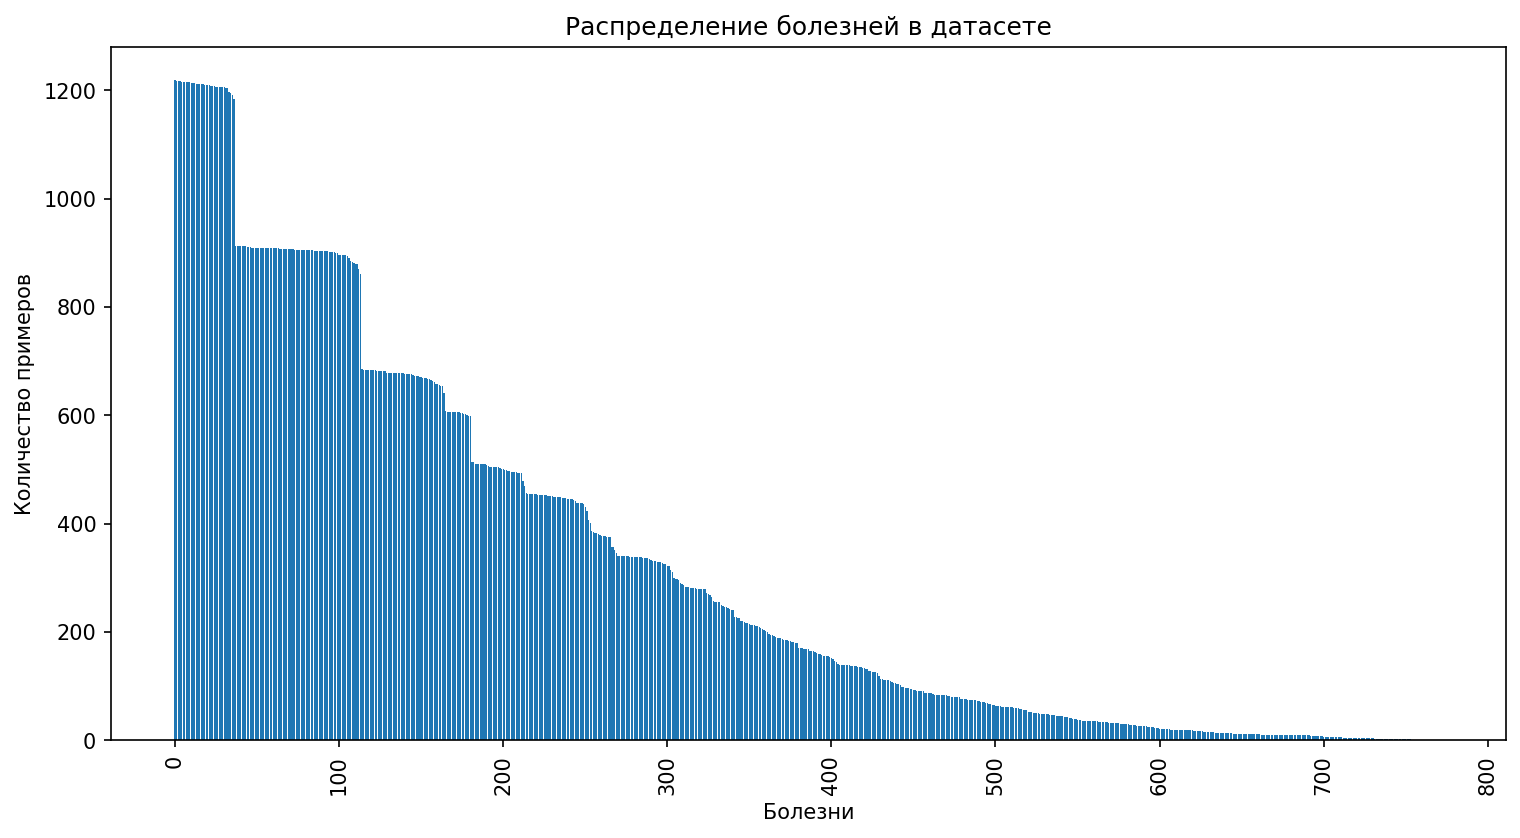

In [27]:
disease_counts = raw_df['diseases'].value_counts()

plt.figure(figsize=(12, 6), dpi=150)
plt.bar(range(len(disease_counts)), disease_counts.values)
plt.title('Распределение болезней в датасете')
plt.xlabel('Болезни')
plt.ylabel('Количество примеров')
plt.xticks(rotation=90)
plt.show()

In [28]:
print("Статистика по болезням:")
print(f"Всего болезней: {len(disease_counts)}")
print(f"Максимум случаев одной болезни: {disease_counts.max()}")
print(f"Минимум случаев одной болезни: {disease_counts.min()}")
print(f"Медиана: {disease_counts.median()}")

Статистика по болезням:
Всего болезней: 773
Максимум случаев одной болезни: 1219
Минимум случаев одной болезни: 1
Медиана: 168.0


In [29]:
print(f"Болезней с < 10 примерами: {len(disease_counts[disease_counts < 10])}")
print(f"Болезней с < 50 примерами: {len(disease_counts[disease_counts < 50])}")

Болезней с < 10 примерами: 96
Болезней с < 50 примерами: 246


Очевиден серьезный дисбаланс клаассов! Датасет содержит заболевания с более чем 1000 строками данных и заболевания со слишком малым количеством данных для дальнейшей работы. Опитмальным вариантом будет следующее: уберем заболевания с менее чем 30 строками данных. В таком случае, конечно, мы потеряем 191 заболевание из 773, однако таким образом мы сможем оставить те болезни, примеров котрых в датафрейме **достаточно** для качественного обучения модели. В любом случае 582 более-меннее популярных зоболевания останутся!

In [30]:
# названия заболеваний с < 30 строками данных
rare_diseases = disease_counts[disease_counts < 30].index

In [31]:
rare_diseases

Index(['pituitary adenoma', 'poisoning due to antidepressants',
       'injury to the spinal cord', 'female infertility of unknown cause',
       'open wound of the foot', 'metastatic cancer', 'vitreous hemorrhage',
       'hemolytic anemia', 'gestational diabetes',
       'normal pressure hydrocephalus',
       ...
       'diabetes', 'thalassemia', 'heat stroke', 'gas gangrene',
       'typhoid fever', 'open wound of the head', 'myocarditis',
       'chronic ulcer', 'hypergammaglobulinemia', 'kaposi sarcoma'],
      dtype='object', name='diseases', length=191)

In [32]:
filtered_df = raw_df.query('diseases not in @rare_diseases')

Теперь порог для болезни в датасете составляет 30 строк

In [33]:
filtered_disease_counts = filtered_df['diseases'].value_counts()

In [34]:
filtered_disease_counts

diseases
cystitis                          1219
vulvodynia                        1218
nose disorder                     1218
complex regional pain syndrome    1217
spondylosis                       1216
                                  ... 
neurofibromatosis                   30
subacute thyroiditis                30
pituitary disorder                  30
syphilis                            30
trichiasis                          30
Name: count, Length: 582, dtype: int64

In [35]:
print("Статистика по болезням:")
print(f"Всего болезней: {len(filtered_disease_counts)}")
print(f"Максимум случаев одной болезни: {filtered_disease_counts.max()}")
print(f"Минимум случаев одной болезни: {filtered_disease_counts.min()}")
print(f"Медиана: {filtered_disease_counts.median()}")

Статистика по болезням:
Всего болезней: 582
Максимум случаев одной болезни: 1219
Минимум случаев одной болезни: 30
Медиана: 332.0


In [36]:
print(f"Болезней с < 30 примерами: {len(filtered_disease_counts[filtered_disease_counts < 30])}")
print(f"Болезней с < 50 примерами: {len(filtered_disease_counts[filtered_disease_counts < 50])}")

Болезней с < 30 примерами: 0
Болезней с < 50 примерами: 55


Есть еще одна возможная проблема: есть ли симптомы, которые **ни разу** не были отмечены ни для какой болезни? Это необходимо проверить!

In [37]:
symptoms = filtered_df.iloc[:, 1:]
symptoms.head()

,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,palpitations,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
symptom_counts = symptoms.sum().sort_values(ascending=True)
symptom_counts.head()

neck weakness                   0
ankle stiffness or tightness    0
back swelling                   0
pus in sputum                   0
infrequent menstruation         0
dtype: int64

Значит, есть симптомы, которые ни разу не встречались ни для какого из 773 заболевания. Фактически они не вносят какого-либо вклада в прогнозирование заболевания. Уберем их.

In [39]:
# Получаем список симптомов, которые никогда не встречаются
unused_symptoms = symptom_counts[symptom_counts == 0].index
unused_symptoms

Index(['neck weakness', 'ankle stiffness or tightness', 'back swelling',
       'pus in sputum', 'infrequent menstruation', 'mass on vulva', 'jaw pain',
       'itching of scrotum', 'change in skin mole size or color',
       'knee cramps or spasms', 'bleeding in mouth', 'posture problems',
       'elbow lump or mass', 'tongue bleeding', 'eyelid retracted', 'polyuria',
       'pupils unequal', 'skin oiliness', 'sleepwalking', 'thirst',
       'elbow stiffness or tightness', 'disturbance of smell or taste',
       'discharge in stools', 'mass on ear', 'hip lump or mass',
       'pelvic pressure', 'feet turned in', 'feeling hot', 'nailbiting',
       'low back swelling', 'swollen tongue', 'throat irritation',
       'underweight', 'hip swelling', 'foot or toe cramps or spasms',
       'incontinence of stool', 'feeling hot and cold',
       'scanty menstrual flow', 'elbow cramps or spasms',
       'abnormal appearing tongue', 'shoulder cramps or spasms',
       'joint stiffness or tightne

In [40]:
len(unused_symptoms)

58

In [41]:
filtered_df = filtered_df.drop(columns=unused_symptoms)

Видим, что больше нет "бессмысленных" в контексте нашей работы столбцов

In [42]:
symptoms = filtered_df.iloc[:, 1:]
symptom_counts = symptoms.sum().sort_values(ascending=True)
symptom_counts.head()

ankle weakness              18
foot or toe lump or mass    20
unwanted hair               22
muscle weakness             34
excessive growth            36
dtype: int64

In [43]:
len(symptom_counts[symptom_counts == 0].index) # как и ожидалось, их 0 штук

0

Давайте переведем все названия болезней и столбцов на русский язык (разумеется, используя онлайн-переводчик!)

In [44]:
with open('diseases_list.txt', 'w', encoding='utf-8') as f:
    for disease in filtered_df['diseases'].unique():
        f.write(f"{disease}\n")


In [45]:
filtered_df['diseases'].unique()

array(['panic disorder', 'vocal cord polyp', 'atrophic vaginitis',
       'fracture of the hand', 'cellulitis or abscess of mouth',
       'eye alignment disorder', 'headache after lumbar puncture',
       'salivary gland disorder', 'osteochondrosis', 'injury to the knee',
       'metabolic disorder', 'vaginitis', 'sick sinus syndrome',
       'tinnitus of unknown cause', 'glaucoma', 'eating disorder',
       'transient ischemic attack', 'pyelonephritis',
       'rotator cuff injury', 'chronic pain disorder',
       'problem during pregnancy', 'liver cancer', 'atelectasis',
       'injury to the hand', 'choledocholithiasis', 'cirrhosis',
       'thoracic aortic aneurysm', 'subdural hemorrhage',
       'diabetic retinopathy', 'fibromyalgia', 'ischemia of the bowel',
       'peritonitis', 'injury to the abdomen', 'acute pancreatitis',
       'thrombophlebitis', 'asthma', 'restless leg syndrome', 'emphysema',
       'cysticercosis', 'induced abortion', 'teething syndrome',
       'infecti

In [46]:
len(filtered_df['diseases'].unique())

582

In [47]:
columns = filtered_df.columns.tolist()
len(columns)

320

In [48]:
with open('columns_list.txt', 'w', encoding='utf-8') as f:
    for column in columns:
        f.write(f"{column}\n")

In [49]:
(filtered_df['regurgitation'] == filtered_df['regurgitation.1']).sum()

np.int64(243259)

In [50]:
len(filtered_df)

244938

In [51]:
filtered_df['regurgitation'].sum() # 2490

np.int64(2490)

In [52]:
filtered_df['regurgitation.1'].sum() # 4169

np.int64(4169)

У нас в датасете оказалось два столбца с практически идентичными названиями: "regurgitation" и "regurgitation.1". После анализа было принято решение удалить столбец "regurgitation", так как можно считать, что "regurgitation.1" - обновленная и более полная версия "regurgitation". Мы сделали это, так как столбец "regurgitation.1" совпал со всеми значениями столбца "regurgitation" и помимо этого имел дополнительные "единички" в тех строках, где их не было в "regurgitation". Поэтому с точки зрения пользы он несет больше информации о симптоме, и взможно, что составители датасета внесли обновленные данные по этому симптому, забыв убрать прежний вариант.

In [53]:
filtered_df = filtered_df.drop(columns='regurgitation')

In [54]:
len(filtered_df.columns.tolist())

319

In [55]:
filtered_df.columns.get_loc('regurgitation.1')

194

In [56]:
# Загружаем переводы болезней
with open('translated_diseases_list.txt', 'r', encoding='utf-8') as f:
    translated_diseases = [line.strip() for line in f.readlines()]

# Загружаем переводы столбцов
with open('translated_columns_list.txt', 'r', encoding='utf-8') as f:
    translated_columns = [line.strip() for line in f.readlines()]


In [57]:
translated_diseases

['паническое расстройство',
 'полип голосовых связок',
 'атрофический вагинит',
 'перелом кисти',
 'целлюлит или абсцесс полости рта',
 'нарушение зрения',
 'головная боль после люмбальной пункции',
 'расстройство слюнных желез',
 'остеохондроз',
 'травма колена',
 'нарушение обмена веществ',
 'вагинит',
 'синдром слабости синусового узла',
 'шум в ушах неизвестной причины',
 'глаукома',
 'расстройство пищевого поведения,',
 'транзиторная ишемическая атака',
 'пиелонефрит',
 'повреждение вращательной манжеты',
 'плеча, хроническая боль',
 'проблемы во время беременности',
 'рак печени',
 'ателектаз',
 'травма кисти',
 'холедохолитиаз',
 'цирроз',
 'печени аневризма грудной аорты',
 'субдуральное кровоизлияние',
 'диабетическая ретинопатия',
 'фибромиалгия',
 'ишемия кишечника',
 'перитонит',
 'травма брюшной полости',
 'острый панкреатит',
 'тромбофлебит',
 'бронхиальная астма',
 'синдром беспокойных ног',
 'эмфизема',
 'цистицеркоз',
 'искусственный аборт',
 'синдром прорезывания зубо

In [58]:
translated_columns

['болезни',
 'тревога и нервозность',
 'депрессия',
 'одышка',
 'депрессивные или психотические симптомы',
 'острая боль в груди',
 'головокружение',
 'бессонница',
 'аномальные непроизвольные движения',
 'стеснение в груди',
 'учащенное сердцебиение',
 'нерегулярное сердцебиение',
 'учащенное дыхание',
 'хриплый голос',
 'боль в горле',
 'затрудненная речь',
 'кашель',
 'заложенность носа',
 'отек горла',
 'ухудшение слуха',
 'ком в горле',
 'ощущение сдавленности в горле',
 'затруднение глотания',
 'отек кожи',
 'задержка мочи',
 'образование в паху',
 'боль в ноге',
 'боль в бедре',
 'боль в надлобковой области',
 'кровь в стуле',
 'задержка роста',
 'эмоциональные симптомы',
 'слабость в локтях слабость',
 'в спине',
 'симптомы со стороны мошонки и яичек',
 'отек мошонки',
 'боль в яичках',
 'метеоризм',
 'выделение гноя из уха',
 'желтуха',
 'образование в мошонке',
 'белые выделения из глаз',
 'раздражительный ребенок',
 'злоупотребляющий алкоголем',
 'обмороки',
 'агрессивное по

In [59]:
# Получаем уникальные названия болезней на английском
unique_diseases_en = filtered_df['diseases'].unique()

# Создаём словарь для замены: {английское название: русское название}
diseases_translation_dict = dict(zip(unique_diseases_en, translated_diseases))


In [60]:
diseases_translation_dict

{'panic disorder': 'паническое расстройство',
 'vocal cord polyp': 'полип голосовых связок',
 'atrophic vaginitis': 'атрофический вагинит',
 'fracture of the hand': 'перелом кисти',
 'cellulitis or abscess of mouth': 'целлюлит или абсцесс полости рта',
 'eye alignment disorder': 'нарушение зрения',
 'headache after lumbar puncture': 'головная боль после люмбальной пункции',
 'salivary gland disorder': 'расстройство слюнных желез',
 'osteochondrosis': 'остеохондроз',
 'injury to the knee': 'травма колена',
 'metabolic disorder': 'нарушение обмена веществ',
 'vaginitis': 'вагинит',
 'sick sinus syndrome': 'синдром слабости синусового узла',
 'tinnitus of unknown cause': 'шум в ушах неизвестной причины',
 'glaucoma': 'глаукома',
 'eating disorder': 'расстройство пищевого поведения,',
 'transient ischemic attack': 'транзиторная ишемическая атака',
 'pyelonephritis': 'пиелонефрит',
 'rotator cuff injury': 'повреждение вращательной манжеты',
 'chronic pain disorder': 'плеча, хроническая боль

In [61]:
# Получаем текущие названия столбцов
current_columns = filtered_df.columns.tolist()

# Создаём словарь для переименования: {английское название: русское название}
columns_translation_dict = dict(zip(current_columns, translated_columns))


In [62]:
columns_translation_dict

{'diseases': 'болезни',
 'anxiety and nervousness': 'тревога и нервозность',
 'depression': 'депрессия',
 'shortness of breath': 'одышка',
 'depressive or psychotic symptoms': 'депрессивные или психотические симптомы',
 'sharp chest pain': 'острая боль в груди',
 'dizziness': 'головокружение',
 'insomnia': 'бессонница',
 'abnormal involuntary movements': 'аномальные непроизвольные движения',
 'chest tightness': 'стеснение в груди',
 'palpitations': 'учащенное сердцебиение',
 'irregular heartbeat': 'нерегулярное сердцебиение',
 'breathing fast': 'учащенное дыхание',
 'hoarse voice': 'хриплый голос',
 'sore throat': 'боль в горле',
 'difficulty speaking': 'затрудненная речь',
 'cough': 'кашель',
 'nasal congestion': 'заложенность носа',
 'throat swelling': 'отек горла',
 'diminished hearing': 'ухудшение слуха',
 'lump in throat': 'ком в горле',
 'throat feels tight': 'ощущение сдавленности в горле',
 'difficulty in swallowing': 'затруднение глотания',
 'skin swelling': 'отек кожи',
 'ret

In [63]:
len(filtered_df['diseases'].unique())

582

In [64]:
filtered_df['diseases'] = filtered_df['diseases'].replace(diseases_translation_dict)


In [65]:
filtered_df = filtered_df.rename(columns=columns_translation_dict)


In [66]:
filtered_df.head()

,болезни,тревога и нервозность,депрессия,одышка,депрессивные или психотические симптомы,острая боль в груди,головокружение,бессонница,аномальные непроизвольные движения,стеснение в груди,...,припухлость суставов,покраснение в области носа или вокруг него,морщины на коже,слабость в стопах или пальцах ног,судороги или спазмы в кистях или пальцах рук,скованность в спине,шишка или образование на запястье,низкое выделение мочи,боль в носу,слабость в лодыжках
0,паническое расстройство,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,паническое расстройство,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,паническое расстройство,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,паническое расстройство,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,паническое расстройство,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [67]:
len(filtered_df['болезни'].unique())

582

In [68]:
columns = filtered_df.columns
len(columns)

319

In [69]:
len(unique_diseases_en)

582

In [70]:
len(translated_diseases)

582

In [71]:
len(diseases_translation_dict)

582

In [72]:
len(set(translated_diseases))

582

In [73]:
len(translated_diseases)

582

Мы убедились, что после обновления названий болезней и симптомов в датасете ничего не было потеряно. После этого можем приступать к реализации модели машинного обучения!

In [74]:
filtered_df.to_csv('filtered_data.csv', index=False)